In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import keras
from keras import layers

In [18]:
print("Numpy " + np.__version__)
print("../tensorflow " + tf.__version__)
print("Keras " + keras.__version__)

Numpy 1.26.4
../tensorflow 2.15.0
Keras 2.15.0


In [19]:
nsamples = 1000
val_ratio = 0.2
test_ratio = 0.2
tflite_model_name = "sine_model"
c_model_name = "sine_model"

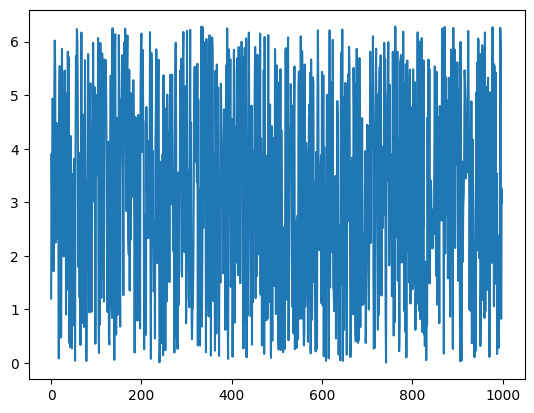

In [20]:
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

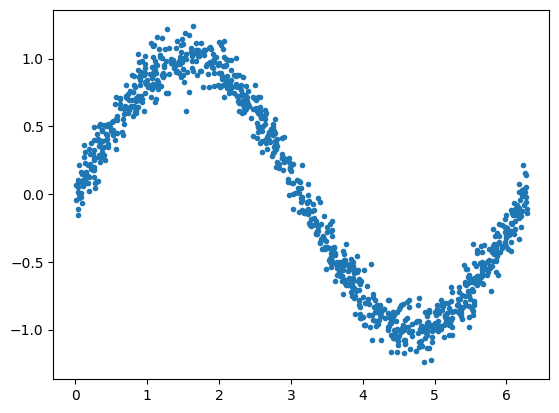

In [21]:
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, ".")

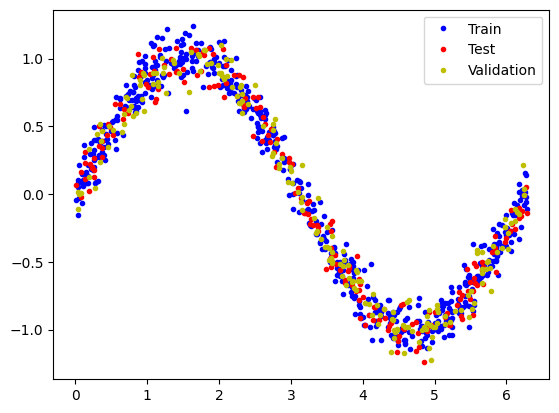

In [22]:
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])

assert (x_train.size + x_val.size + x_test.size) == nsamples

plt.plot(x_train, y_train, "b.", label="Train")
plt.plot(x_test, y_test, "r.", label="Test")
plt.plot(x_val, y_val, "y.", label="Validation")
plt.legend()
plt.show()

In [23]:
print(x_values.shape, y_values.shape)
print(x_train.shape)
# (357, )
# (2, )
# (1, 357)

(1000,) (1000,)
(600,)


In [42]:
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(1,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1))

for layer in model.layers:
  print('input shape: ',layer.input_shape, 'output shape: ',layer.output_shape)

input shape:  (None, 1) output shape:  (None, 16)
input shape:  (None, 16) output shape:  (None, 16)
input shape:  (None, 16) output shape:  (None, 1)


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer="rmsprop", loss="mae", metrics=["mae"])
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(600,) (600,)
(200,) (200,)


In [27]:
history = model.fit(x_train, y_train, epochs=200, batch_size=100, validation_data=(x_val, y_val))

Epoch 1/200


6/6 [==============================] - 0s 20ms/step - loss: 0.5595 - mae: 0.5595 - val_loss: 0.5177 - val_mae: 0.5177
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5382 - mae: 0.5382 - val_loss: 0.5064 - val_mae: 0.5064
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5262 - mae: 0.5262 - val_loss: 0.4995 - val_mae: 0.4995
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5168 - mae: 0.5168 - val_loss: 0.4960 - val_mae: 0.4960
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5120 - mae: 0.5120 - val_loss: 0.4894 - val_mae: 0.4894
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5029 - mae: 0.5029 - val_loss: 0.4835 - val_mae: 0.4835
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4973 - mae: 0.4973 - val_loss: 0.4760 - val_mae: 0.4760
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4894 - mae: 0.4894 - val_loss: 0.47

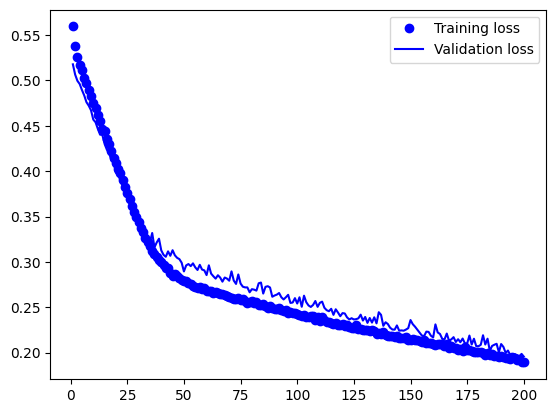

In [28]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()

In [29]:
y = np.sin(1.2)
print(x_test[1])
print(y)

5.536945502409608
0.9320390859672263


7/7 [==============================] - 0s 838us/step
(200,) (200, 1)
predictions =
 [[-1.068]
 [-0.935]
 [-0.588]
 [-1.002]
 [-0.721]
 [-0.71 ]
 [ 0.233]
 [ 0.245]
 [ 0.974]
 [ 0.787]
 [ 0.457]
 [-0.77 ]
 [-0.116]
 [-0.634]
 [-0.592]
 [ 0.6  ]
 [ 0.208]
 [ 0.372]
 [ 0.034]
 [-1.074]
 [ 0.587]
 [ 0.115]
 [-0.99 ]
 [-0.924]
 [ 0.7  ]
 [-0.592]
 [ 0.668]
 [ 0.967]
 [ 0.974]
 [ 0.348]
 [ 0.401]
 [-0.62 ]
 [-0.763]
 [-1.004]
 [ 0.572]
 [ 0.938]
 [ 0.595]
 [-0.862]
 [-0.962]
 [ 0.308]
 [ 0.069]
 [ 0.236]
 [ 0.759]
 [-0.548]
 [ 0.576]
 [ 0.937]
 [ 0.326]
 [-0.58 ]
 [ 0.157]
 [-0.899]
 [ 0.914]
 [-0.767]
 [-0.396]
 [ 0.221]
 [-0.407]
 [-0.631]
 [ 0.927]
 [-0.82 ]
 [-0.567]
 [-0.356]
 [-0.591]
 [-0.668]
 [ 0.984]
 [-0.807]
 [-0.901]
 [-0.725]
 [-0.677]
 [ 0.075]
 [-0.902]
 [-0.639]
 [ 0.796]
 [-0.162]
 [ 0.477]
 [ 0.192]
 [-0.466]
 [-0.892]
 [-1.031]
 [-0.664]
 [ 0.418]
 [ 0.398]
 [ 0.236]
 [ 0.912]
 [-0.407]
 [ 0.91 ]
 [-0.413]
 [-0.14 ]
 [-0.918]
 [-0.715]
 [-0.965]
 [ 0.985]
 [ 0.995]
 [-0.6

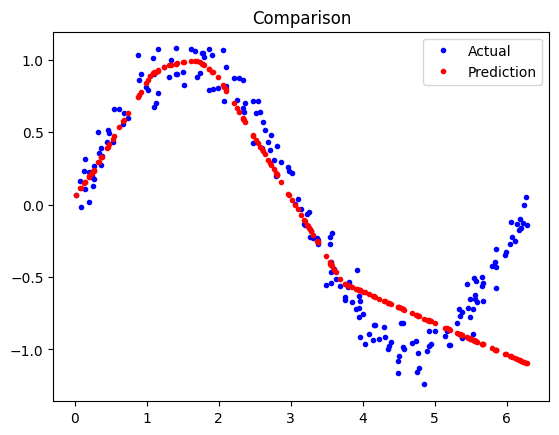

In [38]:
# print(x_test)
predictions = model.predict(x_test)

print(x_test.shape, predictions.shape)

print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", y_test)
print(
    len(x_train),
    " ",
    len(x_test),
    " ",
    len(x_val),
    " ",
    len(predictions),
)


# Convert predictions to class labels
# predicted_labels = np.argmax(predictions, axis=1)
# actual_lab`els = np.argmax(outputs_test, axis=1)

# Compare predictions with actual labels
# correct_predictions = np.sum(predicted_labels == actual_labels)
# total_predictions = len(actual_labels)

# Calculate accuracy
# accuracy = correct_predictions / total_predictions
# print("Accuracy:", accuracy)

plt.clf()
plt.title("Comparison")
plt.plot(x_test, y_test, "b.", label="Actual")
plt.plot(x_test, predictions, "r.", label="Prediction")
plt.legend()
plt.show()

In [39]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizer = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + ".tflite", "wb").write(tflite_model)

import os

basic_model_size = os.path.getsize(tflite_model_name + ".tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: C:\Users\quoct\AppData\Local\Temp\tmp3_0nmz3o\assets


INFO:tensorflow:Assets written to: C:\Users\quoct\AppData\Local\Temp\tmp3_0nmz3o\assets


Model is 3192 bytes


In [40]:
interpreter = tf.lite.Interpreter(model_path="sine_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f"input_details: {input_details}")
print(f"output_details: {output_details}")

# input_data = inputs_test[0:1].astype(np.float32)

# print(input_data)
# # push input data to interpreter
# interpreter.set_tensor(input_details[0]["index"], input_data)

# # start execution
# interpreter.invoke()

# # get the output of this model
# output_data = interpreter.get_tensor(output_details[0]["index"])

# print(output_data)

input_details: [{'name': 'serving_default_dense_3_input:0', 'index': 0, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details: [{'name': 'StatefulPartitionedCall:0', 'index': 9, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [41]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += "#ifndef " + var_name.upper() + "_H\n"
    c_str += "#define " + var_name.upper() + "_H\n\n"

    # Add array length at top of file
    c_str += "\nunsigned int " + var_name + "_len = " + str(len(hex_data)) + ";\n"

    # Declare C variable
    c_str += "alignas(8) const unsigned char " + var_name + "[] = {"
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, "#04x")
        # hex_str = val
        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ","
        if (i + 1) % 12 == 0:
            hex_str += "\n "
        hex_array.append(hex_str)

    # Add closing brace
    c_str += "\n " + format(" ".join(hex_array)) + "\n};\n\n"

    # Close out header guard
    c_str += "#endif //" + var_name.upper() + "_H"

    return c_str


with open(c_model_name + ".h", "w") as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))